In [103]:
import pandas as pd
import numpy as np
import ast

In [40]:
df = pd.read_csv('/home/amir/projects/light-sa-type-inf/ManyTypes4Py_processed_fix/all_fns.csv',
                 low_memory=False)
# dtype={'author': str, 'repo': str, 'file': str, 'set': str,
#                                           'name': str, 'has_type': bool, 'docstring': str,
#                                           'func_descr': str, 'arg_names': object, 'arg_types': object,
#                                           'arg_descrs': object, 'return_type': str, 'return_expr': object,
#                                           'args_occur': object, 'return_descr': str, 'variables': object,
#                                           'variables_types': object, 'aval_types': object, 'arg_names_len': int,
#                                           'arg_types_len': int}

In [66]:
df.head(100)

,author,repo,file,set,cls_name,fn_name,has_type,docstring,fn_descr,arg_names,...,return_descr,cls_variables,cls_variables_types,fn_variables,fn_variables_types,mod_variables,mod_variables_types,aval_types,arg_names_len,arg_types_len
0,nullus,advent2018,repos/nullus/advent2018/tests/test_chocolate_c...,valid,NaN,test part,False,NaN,NaN,"['recipe', 'next score']",...,NaN,NaN,NaN,[],[],"['test data initial state', 'test data', 'test...","['', '', '']","['mark', 'part', 'part', 'text']",2,0
1,nullus,advent2018,repos/nullus/advent2018/tests/test_chocolate_c...,valid,NaN,test part,False,NaN,NaN,"['recipe', 'sequence']",...,NaN,NaN,NaN,[],[],"['test data initial state', 'test data', 'test...","['', '', '']","['mark', 'part', 'part', 'text']",2,0
2,nullus,advent2018,repos/nullus/advent2018/tests/test_chocolate_c...,valid,NaN,test part with puzzle input,False,NaN,NaN,[],...,NaN,NaN,NaN,[],[],"['test data initial state', 'test data', 'test...","['', '', '']","['mark', 'part', 'part', 'text']",0,0
3,nullus,advent2018,repos/nullus/advent2018/tests/test_chocolate_c...,valid,NaN,test part with puzzle input,False,NaN,NaN,[],...,NaN,NaN,NaN,[],[],"['test data initial state', 'test data', 'test...","['', '', '']","['mark', 'part', 'part', 'text']",0,0
4,nullus,advent2018,repos/nullus/advent2018/tests/test_response_re...,train,NaN,test part,False,NaN,NaN,[],...,NaN,NaN,NaN,[],[],['test response record data'],[''],"['text', 'part', 'part', 'impl']",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,nullus,advent2018,repos/nullus/advent2018/src/advent/reservoir_r...,train,NaN,generate map,True,NaN,NaN,['scan location'],...,NaN,NaN,NaN,"['vert seam', 'horiz seam', 'x min', 'x max', ...","['', '', '', '', '', '', '', '', '', '', '', '...",[],[],"['sys', 'count', 'list', 'tuple']",1,1
96,nullus,advent2018,repos/nullus/advent2018/src/advent/reservoir_r...,train,NaN,scan and fill horiz,False,NaN,NaN,['location'],...,NaN,NaN,NaN,"['next scan and fill', 'y', 'x']","['', '', '']",[],[],"['sys', 'count', 'list', 'tuple']",1,0
97,nullus,advent2018,repos/nullus/advent2018/src/advent/reservoir_r...,train,NaN,scan and fill,False,NaN,NaN,['location'],...,NaN,NaN,NaN,"['y', 'last location']","['', '']",[],[],"['sys', 'count', 'list', 'tuple']",1,0
98,nullus,advent2018,repos/nullus/advent2018/src/advent/reservoir_r...,train,NaN,tile total,True,NaN,NaN,"['offset', 'map']",...,NaN,NaN,NaN,['recursion limit'],[''],[],[],"['sys', 'count', 'list', 'tuple']",2,2


In [81]:
df[df['docstring'].notnull() & df['fn_descr'].notnull()].iloc[1]

,author,repo,file,set,cls_name,fn_name,has_type,docstring,fn_descr,arg_names,...,return_descr,cls_variables,cls_variables_types,fn_variables,fn_variables_types,mod_variables,mod_variables_types,aval_types,arg_names_len,arg_types_len
133,nullus,advent2018,repos/nullus/advent2018/src/advent/no_matter_h...,test,NaN,parse claim text,True,x,crude parse record like,['claim text'],...,NaN,NaN,NaN,"['claim id', '', 'offset', 'size', 'offset x',...","['', '', '', '', '', '', '', '']",[],[],"['iterator', 'tuple', 'set']",1,1
157,nullus,advent2018,repos/nullus/advent2018/src/advent/response_re...,train,NaN,impl,True,license apache license see https github com pe...,copyright c peter tseng http github com petert...,['response record text'],...,NaN,NaN,NaN,"['guard', 'start sleep', 'last number', 'wake ...","['', '', '', '', '', '']",[],[],"['defaultdict', 'accumulate', 'findall', 'list...",1,1
243,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,NaN,compute rank,False,note different scipy stats rankdata return ran...,return rank len x,['x'],...,NaN,NaN,NaN,['rank'],[''],"['logger', 'config', 'task', 'result']","['', '', '', '']","['log', 'time', 'namedtuple', 'numpy', 'master...",1,0
260,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,NaN,start,False,force dir already exist delete throw runtime e...,dir directory put output file,['dir'],...,NaN,NaN,NaN,['current'],[''],"['debug', 'info', 'warn', 'error', 'disabled',...","['', '', '', '', '', '', '']","['o', 'shutil', 'sys', 'time', 'order dict', '...",1,0
262,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,NaN,record tabular,False,call diagnostic quantity iteration,log value diagnostic,"['key', 'val']",...,NaN,NaN,NaN,[],[],"['debug', 'info', 'warn', 'error', 'disabled',...","['', '', '', '', '', '', '']","['o', 'shutil', 'sys', 'time', 'order dict', '...",2,0
263,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,NaN,dump tabular,False,level int see logger py doc global logger leve...,write diagnostics current iteration,[],...,NaN,NaN,NaN,[],[],"['debug', 'info', 'warn', 'error', 'disabled',...","['', '', '', '', '', '', '']","['o', 'shutil', 'sys', 'time', 'order dict', '...",0,0
270,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,NaN,get dir,False,none output directory e call start,get directory log file write,[],...,NaN,NaN,NaN,[],[],"['debug', 'info', 'warn', 'error', 'disabled',...","['', '', '', '', '', '', '']","['o', 'shutil', 'sys', 'time', 'order dict', '...",0,0
313,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,Policy,rollout,False,otherwise action noise add,random stream provide rollout take noisy actio...,"['self', 'env', 'render', 'timestep limit', 's...",...,NaN,[],[],"['env timestep limit', 'timestep limit', 'rews...","['', '', '', '', '', '', '', '', '']",['logger'],[''],"['log', 'pickle', 'h py', 'numpy', 'tensorflow...",6,0
325,SynthAI,SynthAI,repos/SynthAI/SynthAI/evolution-strategies-sta...,train,MujocoPolicy,initialize from,False,weight array small current policy,initializes weight another policy must archite...,"['self', 'filename', 'ob stat']",...,NaN,[],[],"['f var name', 'init vals', 'shp', 'f shp', 'i...","['', '', '', '', '', '', '']",['logger'],[''],"['log', 'pickle', 'h py', 'numpy', 'tensorflow...",3,0
345,SynthAI,SynthAI,repos/SynthAI/SynthAI/synthbase/synthbase/logg...,train,NaN,logkv,False,call diagnostic quantity iteration call many t...,log value diagnostic,"['key', 'val']",...,NaN,NaN,NaN,[],[],"['log output format', 'log output format mpi',...","['', '', '', '', '', '', '', '', '', '', '']","['o', 'sys', 'shutil', 'os path', 'json', 'tim...",2,0


In [10]:
print("Number of projects: ", len(set(df.apply(lambda x: x['author'] + "/" + x['repo'], axis=1))))

5092

In [12]:
print(f"Number of source code files: {len(df['file'].unique()):,}")

Number of source code files: 183,916


In [47]:
print(f"Number of functions: {len(df.fn_name):,}")

Number of functions: 2,096,797


In [50]:
print(f"Number of classes: {df.cls_name.count():,}")

Number of classes: 1,438,151


In [15]:
print(f"Number of functions with a type: {len(df[df['has_type'] == True]):,}")

Number of functions with a type: 374,832


In [30]:
print(f"Number of arguemts: {sum(df['arg_names'].apply(lambda x: len(ast.literal_eval(x)))):,}")

Number of arguemts: 3,923,667


In [32]:
print(f"Number of arguemts with types: {sum(df['arg_types'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")

Number of arguemts with types: 480,793


In [33]:
print(f"Number of functions with a return type: {df['return_type'].count():,}")

Number of functions with a return type: 325,532


In [34]:
print(f"Number of functions with docstring: {df['docstring'].count():,}")

Number of functions with docstring: 235,683


In [36]:
print(f"Number of functions with description: {df['func_descr'].count():,}")

Number of functions with description: 672,914


In [38]:
print(f"Number of arguemts with comments: {sum(df['arg_descrs'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")

Number of arguemts with comments: 220,976


In [79]:
print(f"Number of functions with a comment: {df['docstring'].count() + df['fn_descr'].count() + sum(df['arg_descrs'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != '']))):,}")

Number of functions with a comment: 1,129,573


In [39]:
print(f"Number functions with a return type comment: {df['return_descr'].count():,}")

Number functions with a return type comment: 62,564


In [90]:
args_t = list(df['arg_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
ret_t = list(df[df['return_type'].notnull()]['return_type'].values)
fn_vars_t = list(df['fn_variables_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))
cls_vars_t = [t for cls_t in df.drop_duplicates('cls_name', keep='last')[df['cls_variables_types'].notnull()]['cls_variables_types'] for t in ast.literal_eval(cls_t) if t != '']
mod_vars_t = list(df.drop_duplicates('file', keep='last')['mod_variables_types'].apply(lambda x: [t for t in ast.literal_eval(x) if t != '']))

/home/amir/py_venv/py_36_new/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [91]:
print(f"Total Number of type annotations: {sum([len(t)for t in args_t]) + len(ret_t) + sum([len(t) for t in fn_vars_t]) + len(cls_vars_t) + sum([len(t) for t in mod_vars_t]):,}")

Total Number of type annotations: 869,825


In [93]:
print(f"Number of unique types: {len(set([t for l in args_t for t in l] + ret_t + [t for l in fn_vars_t for t in l] + cls_vars_t + [t for l in mod_vars_t for t in l])):,}")

Number of unique types: 67,060


In [76]:
sum(df.drop_duplicates('file', keep='last')['mod_variables_types'].apply(lambda x: len([t for t in ast.literal_eval(x) if t != ''])))

4068

In [85]:
len(df[df['return_type'].notnull()]['return_type'].values)

325532

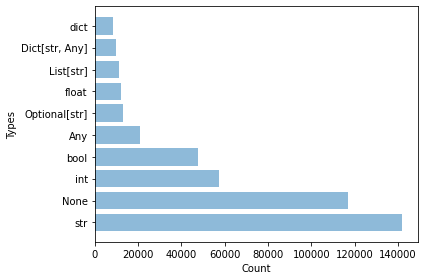

In [105]:
from collections import Counter
import matplotlib.pyplot as plt

all_types = [l for t in args_t for l in t] + ret_t + \
             [l for t in fn_vars_t for l in t] + cls_vars_t + [l for t in mod_vars_t for l in t]
top_n=10

# Already sorted
df = pd.DataFrame.from_records(Counter(all_types).most_common(top_n), columns=['type', 'count'])

types = df['type'].values[:top_n]
counts = df['count'].values[:top_n]
y_pos = np.arange(len(counts))

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.xlabel('Count')
plt.ylabel('Types')
#plt.title('Top %d most frequent types in the dataset' % top_n)
plt.tight_layout() # Fixes the Y axis lables to be shown completely.

plt.savefig('top-%d-most-frequent-types.pdf' % top_n, format='pdf', bbox_inches='tight',
            dpi=256)
plt.show()

In [97]:
all_types

['str',
 'Tuple[int, int]',
 'List[List[str]]',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'int',
 'int',
 'str',
 'str',
 'int',
 'int',
 'Iterator[str]',
 'Dict[Tuple[int, int], int]',
 'Tuple[int, int]',
 'int',
 'Iterator[str]',
 'str',
 'str',
 'List[int]',
 'List[int]',
 'int',
 'List[int]',
 'str',
 'str',
 'List[List[str]]',
 'List[List[str]]',
 'List[List[str]]',
 'str',
 'str',
 'int',
 'str',
 'str',
 'List[Unit]',
 'List[Unit]',
 'str',
 'str',
 "'Unit'",
 "'Unit'",
 'str',
 'Iterator[Claim]',
 'Iterator[Claim]',
 'Iterator[Claim]',
 'str',
 'str',
 'int',
 'int',
 'str',
 'int',
 'int',
 'int',
 'int',
 'object',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'int',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'str',
 'int',
 'int',
 "'Vector'",
 "'Vector'",
 'object',
 "'Vector'",
 'int',
 'str',
 'int',
 'int',
 'int',
 "'Actor'",
 'Vector',
 'str',
 'Actor